# Build a Neural Network Model that Describes Images
$\textit{Samira Abnar, s.abnar@uva.nl}$

In this Assignment you will get familiarized with two successful neural network models for vision and language, Convolutional Neural Networks(CNN) and Long Short Term Memory Networks(LSTM).

You will see how you can build a model that can generate captions for images putting a CNN and an LSTM together. The model you will build is based on what is proposed in 
[this paper](https://scholar.google.com/citations?view_op=view_citation&hl=en&user=NkzyCvUAAAAJ&citation_for_view=NkzyCvUAAAAJ:L8Ckcad2t8MC).

We are going to use Python as the programming language and Theano as the library to implement the neural network operations. You can follow the tutoral on building a simple Convolutional Neural Network with theano and python [here](https://github.com/samiraabnar/CNN_Tutorial/blob/master/CNN_Tutorial.ipynb) to aquire the basics you need to do this assignment. (You can also find it under the CNN_Tutorial folder.)

If you are working on Unix based OS, that is quiet easy to install python and the required packages. Otherwise you can use DataJoy to run the codes.
https://www.getdatajoy.com/project/584e94299331a5373bee73c7 . If you are running the codes on getdatajoy make sure you make an account first, then make a copy of the project and work on your own copy.


For this assignment you need to hand in a pdf document including all answers to the questions. (Plots + Explanations)


## Convolutional Neural Networks

Convolutional Neural Networks are a type of feed forward neural networks that are inspired by the way visual information is processed in human brain and they were primarily proposed for image recognition tasks. 

For some types of tasks (e.g. for images presented briefly and out of context), it is thought that visual processing in the brain is hierarchical, one layer feeds into the next, computing progressively more complex features. This is the inspiration for the layered design of modern feed-forward neural networks, deep learning models [[neuwritesd.org]](neuwritesd.org)

<img src="visual_stream_small.png" />

In principle in feedforward neural networks the nodes are organized into layers and nodes of each layer can only have forward connections with the nodes of the next layer and backward connection with the nodes of the previous layer. In CNNs these connections between layers are kind of localized i.e. the connections do not  cover the whole input(image) instantly but only a part of it and they sweep the input(image) to cover all of it. This is what is called the Convolution step. There are four main layers in CNNs that you need to understand first in order to understand how they work. The first layer type is the convolution layer. 
Here you can see a visualisation of the Convolution step:
<img src=https://bamos.github.io/data/2016-08-09/padding_strides_transposed.gif />

Mathematecally what happens is that you have a set of connections(weights), say a KxM matrix W, these weight are applied at different location of the input image (boxes of size KxM) each pixel is multiplied by it corresponding weight and then they are all summed up. As you see in the picture, this results in a new matrix, which is called a feature map or a convolved feature



##### <i class="fa fa-lightbulb-o "></i>     <span>Having and NxN image, if we apply a KxK convolution matrix on it, what would be the size of the output?</span>

In the code below we read an image of a cat to into a 3d tensor. (A 2 dimensional image with 1 additional dimension for color  channels)

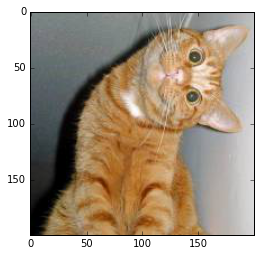

In [12]:
import theano
from theano import tensor as T
from theano.tensor.nnet import conv2d
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

#This line instantiates an object that can be used to generate random numbers
rng = np.random.RandomState(23455)


#open an image: read the image into pixels

img = Image.open("cat.jpg")
img = np.asarray(img, dtype='float32') / 256
img_ = img.transpose((2, 0, 1))

plt.figure(1)
imgplot1 = plt.imshow(img)



Then using theano we define the symbolic expressions for applying the convolution operation on an image input.

In [15]:
#Here we define the symbolic input and indicate that it is a 4d matrix
input = T.tensor4("image_tensor")

#filter size is the size of the convolution weight matrix
filter_size = 32
w_shp = (1,3, filter_size, filter_size)
w_bound = np.sqrt(3 * filter_size* filter_size)

#initialize W, the weight matrix, as a theano shared variable.
W = theano.shared( np.asarray(
            rng.uniform(
                low=-1.0 / w_bound,
                high=1.0 / w_bound,
                size=w_shp),
            dtype=input.dtype), name ='W')

#conv2d function is computing the convolution output
conv_out = conv2d(input, W)
relu_output = T.nnet.relu(conv_out)
conv_step = theano.function([input],[relu_output])

And here we apply the convolution operation on our image.

(1, 3, 200, 200)


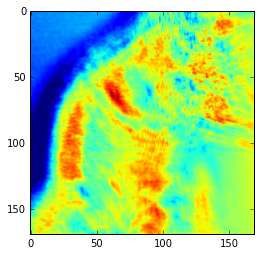

In [18]:
img2 = np.expand_dims(img_, axis=0)
print(img2.shape)
output = conv_step(img2)

#plotting the output
plt.figure(1)
imgplot = plt.imshow(output[0][0][0])

##### <i class="fa fa-lightbulb-o "></i> What is the effect of increasing and decreasing the filter size?

##### <i class="fa fa-lightbulb-o "></i>     How do you think the pattern of the filter matrix affects the output? 

##### <i class="fa fa-lightbulb-o "></i>     If you apply the convolution step multiple times how the result change at each step? In other words, the deeper you go? Implement this and include the picture of the outputs for at least two consequitive convolution steps in your report.

Similar to other feed forward neural networks, there is also the activation layer in CNNs. So after each convolution layer there is normally an activation layer. In most of the existing CNN architectures ReLU(Rectified Linear Unit) is used as the activation function. 

<img src="https://ml4a.github.io/images/figures/relu.png" />

##### <i class="fa fa-lightbulb-o "></i>     Apply the ReLU activation function on the output of the convolution step in the above code, how does it change the output?

The next layer after the convolution layer(includeing the activation function) in CNNs is the pooling step (also called downsampling). The main prupose of this step is to reduce the dimensionality of the feature maps while preserving the important features. There are different types of pooling i.e. Max pooling, Mean Pooling, Sum Pooling.

Here is a picture illustrating Max Pooling:
<img src="https://ujwlkarn.files.wordpress.com/2016/08/screen-shot-2016-08-10-at-3-38-39-am.png?w=988", width="300">


The code below, apply max pooling on the last output we have.

##### <i class="fa fa-lightbulb-o "></i>     Change the value of the down sampling size and report its effect.

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


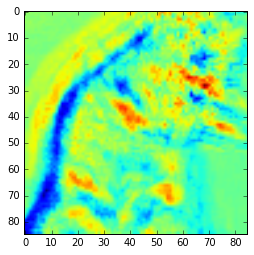

In [4]:
from theano.tensor.signal.downsample import *

down_sample_size = 2
pooling_input = T.tensor4("pooling_input")
pooling_output = max_pool_2d( pooling_input, ds = (down_sample_size,down_sample_size) , mode='max', ignore_border=False)
                          
pool_step = theano.function([pooling_input],[pooling_output])
                          
                          
plt.figure(1)
imgplot = plt.imshow(pool_step(output[0])[0][0][0])

So far, you have seen what happens in the Convolutional Layer, Activation Layer and Pooling Layer. The last type of layers in CNNs is the Fully Connected Layer. In the fully connected layer all the input nodes are connected to all the output nodes. Thus, after one or more sequences of convolution-activation-pooling layers, the output of the newtwork is flattened into a one dimensional array, and there are one or more fully connected layers, mapping the flattened feature vector representation, normally for the purpose of classification.






##### <i class="fa fa-lightbulb-o "></i>     Draw a high level structure of a CNN Network along with a description of its hyper parameters. Parameters of the networks are the weight matrixes and learning rate, the ones that can be tuned and learned. Hyper parameters are one lever higher, the prior decisions that you make about the model, i.e. depth of the network(number of layers), properties of each leyer (type, size) etc.

There are several different architectures for CNNs i.e. LeNet, AlexNet, GoogleNet, VGGNet, ResNets. In this assignment you are going to employ an instance of a VGGNet.



## Long Short Term Memory Networks

Recurrent neural networks are supposed to be a high level models of how sequential data is processed in human brain. In these networks, the output of the network at each step is computed not only based on the current input but also the previous state of the network.

LSTM networks are recurrent networks equipped with a memory compartment. At each LSTM block in addition to the nodes representing the state of the network, there are nodes( a vector) functioning as the memory of the network. Furthermore, there are gates controling how the state of the network, the memory content and the output should change at each timestep according the current input and the previous state. 



Here is a blog with very good explanation for the LSTM networks:
http://colah.github.io/posts/2015-08-Understanding-LSTMs/

## Here is a pricture of what we are trying to build in this asignment:

<img  src="tikz-figure0.png",width="400"/>

In [19]:
#importing everything we need 
import theano
import theano.tensor as T
import numpy as np

from lasagne.updates import sgd, apply_momentum

from src.VGG_16 import *
from src.util import * 


In [6]:
VOCAB = ['#', 'red','green','blue','square','circle','$']
Dic = {'#':0, 'red':1, 'green':2, 'blue':3, 'square':4, 'circle':5, '$':6}
ONE_HOT_VECS = np.eye(len(VOCAB))

#This line instantiates an object that can be used to generate random numbers
rng = np.random.RandomState(23455)


Here we make the feature vectors for the images from the 6 categories:
red square, red circle, blue square, blue circle, green square, green circle. We use a vector of size 5 to represent these objects. 3 elements for determining the color and 2 for the shape.

In [7]:
red_squares = np.repeat([np.asarray([1,0,0,1,0],dtype="float32")],100,axis=0)
red_square_label = np.asarray([(ONE_HOT_VECS[Dic["red"]]),(ONE_HOT_VECS[Dic["square"]])],dtype="float32")
red_square_labels =  np.repeat([red_square_label], len(red_squares),axis=0)

green_squares = np.repeat([np.asarray([0,1,0,1,0],dtype="float32")],100,axis=0)
green_square_label = np.asarray([(ONE_HOT_VECS[Dic["green"]]),(ONE_HOT_VECS[Dic["square"]])],dtype="float32")
green_square_labels =  np.repeat([green_square_label], len(green_squares),axis=0)

blue_squares = np.repeat([np.asarray([0,0,1,1,0],dtype="float32")],100,axis=0)
blue_square_label = np.asarray([(ONE_HOT_VECS[Dic["blue"]]),(ONE_HOT_VECS[Dic["square"]])],dtype="float32")
blue_square_labels =  np.repeat([blue_square_label], len(blue_squares),axis=0)

red_circles = np.repeat([np.asarray([1,0,0,0,1],dtype="float32")],100,axis=0)
red_circle_label = np.asarray([(ONE_HOT_VECS[Dic["red"]]),(ONE_HOT_VECS[Dic["circle"]])],dtype="float32")
red_circle_labels =  np.repeat([red_circle_label], len(red_circles),axis=0)

green_circles = np.repeat([np.asarray([0,1,0,0,1],dtype="float32")],100,axis=0)
green_circle_label = np.asarray([(ONE_HOT_VECS[Dic["green"]]),(ONE_HOT_VECS[Dic["circle"]])],dtype="float32")
green_circle_labels =  np.repeat([green_circle_label], len(green_circles),axis=0)

blue_circles = np.repeat([np.asarray([0,0,1,0,1],dtype="float32")],100,axis=0)
blue_circle_label = np.asarray([(ONE_HOT_VECS[Dic["blue"]]),(ONE_HOT_VECS[Dic["circle"]])],dtype="float32")
blue_circle_labels =  np.repeat([blue_circle_label], len(blue_circles),axis=0)


#Make list of shapes
shapes = []
shapes.extend(red_squares)
shapes.extend(green_squares)
shapes.extend(blue_squares)
shapes.extend(red_circles)
shapes.extend(green_circles)
shapes.extend(blue_circles)

#Make list of labels
labels = []
labels.extend(red_square_labels)
labels.extend(green_square_labels)
labels.extend(blue_square_labels)
labels.extend(red_circle_labels)
labels.extend(green_circle_labels)
labels.extend(blue_circle_labels)



Below we have defined the ImageCaptionGenerator. 

##### <i class="fa fa-lightbulb-o "></i>    Look into the define_network function in the ImageCaptionGenerator class defined below. The lstm_step is where the symbolic expression of the LSTM block is coded. Draw a graph that shows how the components of the LSTM block are related (Draw the computation graph of the LSTM block).

##### <i class="fa fa-lightbulb-o "></i>     What is the loss function of the LSTM network in this assignment? 

In [8]:
class ImageCaptionGenerator(object):
    
    def __init__(self, 
                 image_rep_dim, 
                 lstm_input_dim, 
                 lstm_hidden_dim, 
                 output_dim, 
                 learning_rate,vocab_size):
        self.image_rep_dim = image_rep_dim
        self.lstm_input_dim = lstm_input_dim
        self.lstm_hidden_dim = lstm_hidden_dim
        self.output_dim = output_dim
        self.learning_rate = learning_rate
        self.vocab_size = vocab_size
        self.init_params()
     
    
    def init_shared_variable(self,dim1,dim2,name):
        w_shp = (dim1,dim2)
        w_bound = np.sqrt(dim1 * dim2)

        #initialize W, the weight matrix, as a theano shared variable.
        return theano.shared( np.asarray(
                    rng.uniform(
                        low=-1.0 / w_bound,
                        high=1.0 / w_bound,
                        size=w_shp),
                    dtype="float32"), name = name)
    

#In this function parameters of the network, the weight matrixes are initialized randomely.
    def init_params(self):
      
        self.WordEmbedding = self.init_shared_variable(self.lstm_input_dim, self.output_dim,"WordEmbedding")
        self.ImageEmbedding = self.init_shared_variable(self.lstm_input_dim, self.image_rep_dim,"ImageEmbedding")

        self.U_input = self.init_shared_variable(self.lstm_hidden_dim, self.lstm_input_dim,name="U_input")

        self.U_forget = self.init_shared_variable(self.lstm_hidden_dim, self.lstm_input_dim,name="U_forget")

        self.U_output = self.init_shared_variable(self.lstm_hidden_dim, self.lstm_input_dim, name="U_output")

        self.W_input = self.init_shared_variable(self.lstm_hidden_dim, self.lstm_hidden_dim,name="W_input")

        self.W_forget = self.init_shared_variable(self.lstm_hidden_dim, self.lstm_hidden_dim,name="W_forget")

        self.W_output = self.init_shared_variable(self.lstm_hidden_dim, self.lstm_hidden_dim,name="W_output")


        self.W = self.init_shared_variable(self.lstm_hidden_dim, self.lstm_hidden_dim, name="W")
        self.U = self.init_shared_variable(self.lstm_hidden_dim, self.lstm_input_dim, name="U")

        self.O_w = self.init_shared_variable(self.output_dim, self.lstm_hidden_dim, name="O_w")

        
        bias_input = np.zeros(self.lstm_hidden_dim, dtype=theano.config.floatX)
        bias_forget = np.zeros(self.lstm_hidden_dim, dtype=theano.config.floatX)
        bias_output = np.zeros(self.lstm_hidden_dim, dtype=theano.config.floatX)
        bias = np.zeros(self.lstm_hidden_dim, dtype=theano.config.floatX)
        
        self.bias = theano.shared(value=bias, name="bias", borrow="True")
        self.bias_input = theano.shared(value=bias_input, name="bias_input", borrow="True")
        self.bias_output = theano.shared(value=bias_output, name="bias_output", borrow="True")
        self.bias_forget = theano.shared(value=bias_forget, name="bias_forget", borrow="True")

        
        self.params = [self.U_input, self.U_forget, self.U_output, self.W_input, self.W_forget, self.W_output,
                       self.U, self.W,
                       self.O_w, self.WordEmbedding, self.ImageEmbedding,
                       self.bias, self.bias_input, self.bias_output, self.bias_forget]
    
    def define_network(self):
        
        Y = T.matrix('output')
        H = T.vector('init_state')
        
        def lstm_step(prev_output,prev_state,prev_content):
            input_gate = T.nnet.hard_sigmoid(T.dot(( self.U_input),prev_output) + T.dot(self.W_input,prev_state) + self.bias_input)
            forget_gate = T.nnet.hard_sigmoid(T.dot(( self.U_forget),prev_output) + T.dot(self.W_forget,prev_state)+ self.bias_forget)
            output_gate = T.nnet.hard_sigmoid(T.dot((self.U_output),prev_output) + T.dot(self.W_output,prev_state)+ self.bias_output)



            stabilized_input = T.tanh(T.dot((self.U),prev_output) + T.dot(self.W,prev_state) + self.bias)
            c = forget_gate * prev_content + input_gate * stabilized_input
            s = output_gate * T.tanh(c) 
            
            output = T.nnet.softmax(T.dot(self.O_w,s))[0]
            
            next_input = T.dot(self.WordEmbedding,output)
            
            return [output,next_input,s,c],  theano.scan_module.until(np.argmax(output) > (self.vocab_size - 2))
        
        
        [self.output,_,self.hidden_state, self.memory_content], updates = theano.scan(
            lstm_step,
            truncate_gradient=-1,
            n_steps= 2,
            outputs_info=[None,dict(initial = T.dot(self.ImageEmbedding,H)),
                          dict(initial= T.zeros(self.lstm_hidden_dim, dtype=theano.config.floatX)),
                          dict(initial=T.zeros(self.lstm_hidden_dim, dtype=theano.config.floatX)),
                          ])
                                                          
        
        self.predict = theano.function([H],[self.output])

        params = self.params

        padded_output = T.zeros(Y.shape) 
        padded_output = T.set_subtensor(padded_output[0:self.output.shape[0],:],self.output)
        padded_output = T.set_subtensor(padded_output[self.output.shape[0]:, :], T.eye(self.output_dim)[self.output_dim - 1])
       
        cost = T.sum(T.nnet.categorical_crossentropy(padded_output + 0.000001,Y))
        
        updates_sgd = sgd(cost, params, learning_rate=self.learning_rate)
        updates = apply_momentum(updates_sgd, params, momentum=0.9)
        
        self.backprop_update = theano.function([H, Y], [cost], updates=updates)


In [9]:
#instantiating the caption generator model
cp = ImageCaptionGenerator(image_rep_dim = shapes[0].shape[0], 
                 lstm_input_dim = 10, 
                 lstm_hidden_dim = 20, 
                 output_dim = len(VOCAB), 
                 learning_rate = 0.01,
                 vocab_size = len(VOCAB))

cp.define_network()

In [10]:
predicted_label = cp.predict(shapes[0])
print(get_string(predicted_label[0],VOCAB))

predicted_label = cp.predict(shapes[1])
print(get_string(predicted_label[0],VOCAB))

predicted_label = cp.predict(shapes[2])
print(get_string(predicted_label[0],VOCAB))

predicted_label = cp.predict(shapes[3])
print(get_string(predicted_label[0],VOCAB))

blue blue
blue blue
blue blue
blue blue


### Training the Model
Devide your data into train and test sets explain what are the criteria that should be considered in making test and train sets and report accuracies for train and test sets for each of the below cases. For the three first cases run the training until you get 100% accuracy. 

Hint#1: use the get_accuracy function defined below to calculate accuracy! 

Hint#2: Increase the number of epochs if one epoch is not enough!

Hint#3: What is epoch? 
''During iterative training of a neural network , an Epoch is a single pass through the entire training set''

Hint#5: For the first and second exercises change the lines where labels are defined. For example for red_square_labels change:

In [11]:
red_square_label = np.asarray([(ONE_HOT_VECS[Dic["red"]]),(ONE_HOT_VECS[Dic["square"]])],dtype="float32")

to:

In [12]:
red_square_label = np.asarray([(ONE_HOT_VECS[Dic["red"]]),(ONE_HOT_VECS[Dic["$"]])],dtype="float32")
#Or
red_square_label = np.asarray([(ONE_HOT_VECS[Dic["square"]]),(ONE_HOT_VECS[Dic["$"]])],dtype="float32")


##### <i class="fa fa-lightbulb-o "></i>     train the network to label images based on their color

##### <i class="fa fa-lightbulb-o "></i>     train the network to label images based on their shape

##### <i class="fa fa-lightbulb-o "></i>     Now train the network to label images using the combinations of color and shape

##### <i class="fa fa-lightbulb-o "></i>     what happens if you completely remove one of the image-shape combination collections (say all blue circles) from the training set in each of these conditions. Is the network able to label it in the test time? How can you explain this?

In [13]:
#Defining a function that calculates accuracy:
def get_accuracy(model,shapes,labels):
    corrects = 0
    for i in np.arange(len(shapes)):
         predicted_label = model.predict(shapes[i])
        
         p_str = get_string(predicted_label[0],VOCAB)
         t_str = get_string(labels[i],VOCAB)
        
         if p_str == t_str:
            corrects += 1
    return corrects / len(shapes)
    
#Preparing Train and Test Sets    
shuffled_indexes = np.random.permutation(len(shapes))

train_indexes = shuffled_indexes[0:400]
test_indexes = shuffled_indexes[400:]


train_shapes = np.asarray(shapes)[train_indexes]
test_shapes = np.asarray(shapes)[test_indexes]
train_labels = np.asarray(labels)[train_indexes]
test_labels = np.asarray(labels)[test_indexes]


In [14]:
number_of_epochs = 2
iteration = 0
accuracies = []


In [20]:

for e in np.arange(number_of_epochs):
    np.random.shuffle(train_indexes)
    corrects = 0
    for i in train_indexes:
        iteration += 1
        
        predicted_label = cp.predict(shapes[i])
        p_str = get_string(predicted_label[0],VOCAB)
        t_str = get_string(labels[i],VOCAB)
        print("Predicted: "+p_str+" Target:"+t_str)       

        cp.backprop_update(shapes[i],labels[i])
        if p_str == t_str:
            corrects += 1
        if iteration % 10 == 0:
            accuracies.append(get_accuracy(cp,test_shapes,test_labels))
    accuracy = corrects / len(train_indexes)
    print("accuracy at epoch# "+str(e)+": "+str(accuracy))
    

Predicted: green circle Target:green square
Predicted: blue square Target:blue square
Predicted: red circle Target:red circle
Predicted: green circle Target:green circle
Predicted: green circle Target:green square
Predicted: green circle Target:green circle
Predicted: red circle Target:red circle
Predicted: green circle Target:green square
Predicted: red square Target:red square
Predicted: red circle Target:red circle
Predicted: red circle Target:red circle
Predicted: blue square Target:blue square
Predicted: blue circle Target:blue circle
Predicted: blue square Target:blue square
Predicted: red square Target:red square
Predicted: red circle Target:red circle
Predicted: red square Target:red square
Predicted: red circle Target:red circle
Predicted: red circle Target:red circle
Predicted: blue circle Target:blue circle
Predicted: green circle Target:green circle
Predicted: red circle Target:red circle
Predicted: blue square Target:blue square
Predicted: blue circle Target:blue circle
Pr

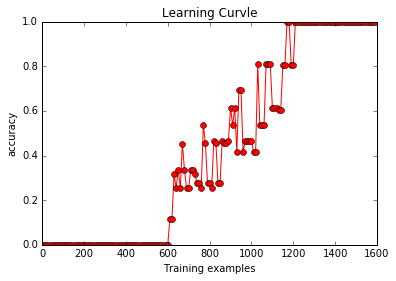

In [21]:

train_size = np.arange(0,len(accuracies)*10,10)
plt.figure()
plt.title("Learning Curvle")
plt.ylim(0,1)
plt.xlabel("Training examples")
plt.ylabel("accuracy")
plt.plot(train_size, accuracies, 'o-', color="r",
             label="Training score")

You have seen in the previous assignment that learning rate can affect the learning process of a network. 

##### <i class="fa fa-lightbulb-o "></i>     Explain how the leaning rate affects the caption generator model (include learning curve graphs in your report.)

##### <i class="fa fa-lightbulb-o "></i>     What is a reasonoble way to dynamically change the learning rate in the training phase?

<span class="burk">Attention! When you want to run the model multiple times, make sure to reinitialize the whole model, so that you are not retraining a model that is already trained!</span>
